In [3]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install msa

In [5]:
import msa
import pandas as pd
import numpy as np


mcdonalds = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mcdonalds.csv")
names_mcdonalds = mcdonalds.columns
print(names_mcdonalds)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [6]:
mcdonalds.shape

(1453, 15)

In [7]:
mcdonalds.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [8]:
MD_x = mcdonalds.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
result = round(MD_x.mean(), 2)
print(result)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [9]:
from sklearn.decomposition import PCA

MD_pca = PCA()
MD_pca.fit(MD_x)

print("Standard Deviation",np.sqrt(MD_pca.explained_variance_))
print("\n""Proportion of Variance",MD_pca.explained_variance_ratio_,"\n")
print("Cumulative Proportion",MD_pca.singular_values_)

Standard Deviation [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]

Proportion of Variance [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326] 

Cumulative Proportion [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]


In [10]:
np.set_printoptions(precision=1, suppress=True)
print("Standard Deviations of Principal Components:")
print(np.sqrt(MD_pca.explained_variance_))

Standard Deviations of Principal Components:
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [11]:

# Print the rotation matrix
print("Rotation Matrix:")
print(MD_pca.components_)

Rotation Matrix:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


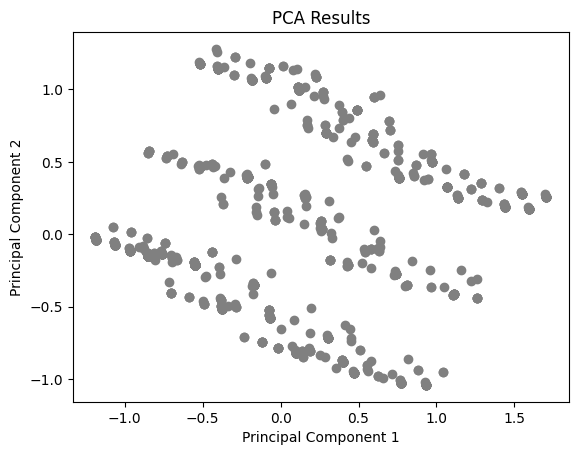

Principal Axes:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Assuming you have your data loaded or generated, replace this with your actual data
# X, y = ...
X = MD_x
 # Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='grey', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

# Get the principal axes
principal_axes = pca.components_

# Print the principal axes
print("Principal Axes:")
print(principal_axes)

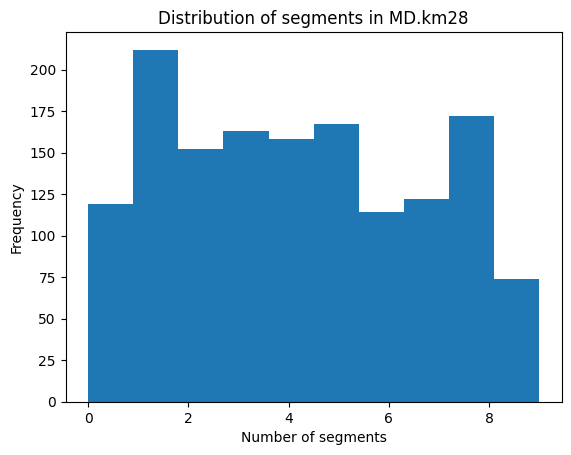

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Set random seed (assuming NumPy is imported)
np.random.seed(1234)


# Assuming MD_pca is a 2D array
data = MD_x

# Perform KMeans clustering with 2 to 8 clusters and 10 repetitions
kmeans = KMeans(n_clusters=10, n_init=10, random_state=1234)
kmeans.fit(data)

# Extract cluster labels
labels = kmeans.labels_

# Relabel clusters (assuming 0-based indexing)
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

# Assign the relabeled clusters to MD.km28
MD_km28 = labels

# Assuming MD.km28 is a list or array containing cluster labels
cluster_labels = MD_km28

# Create a histogram to visualize cluster distribution
plt.hist(cluster_labels)
plt.xlabel("Number of segments")
plt.ylabel("Frequency")
plt.title("Distribution of segments in MD.km28")
plt.show()


In [14]:
print(type(MD_km28))

<class 'numpy.ndarray'>


In [ ]:
import numpy as np
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(1234)

# Assuming MD.x is your data DataFrame in Python (replace it with your actual data)
# If not, replace MD.x with your actual data DataFrame

# Function to perform KMeans clustering and calculate adjusted Rand index
def kmeans_and_rand_index(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(data.reshape(-1, 1))  # Use values to get the underlying NumPy array
    return adjusted_rand_score(true_labels, labels)

# Number of bootstrap samples and repetitions
n_boot = 100
n_rep = 10

# Number of segments to consider
segments_range = range(2, 9)

# True labels (replace true_labels with your actual labels)
true_labels = np.random.randint(0, 2, size=len(MD_km28))

# Bootstrap resampling and clustering
rand_indices = np.zeros((n_boot, len(segments_range), n_rep))

for i in range(n_boot):
    for j, n_segments in enumerate(segments_range):
        for k in range(n_rep):
            bootstrap_sample = resample(MD_km28)  # Use .values to get the underlying NumPy array
            rand_indices[i, j, k] = kmeans_and_rand_index(bootstrap_sample, n_segments)

# Calculate mean Rand indices across repetitions
mean_rand_indices = np.mean(rand_indices, axis=2)

# Plot the results
plt.plot(segments_range, mean_rand_indices.mean(axis=0), marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")
plt.show()


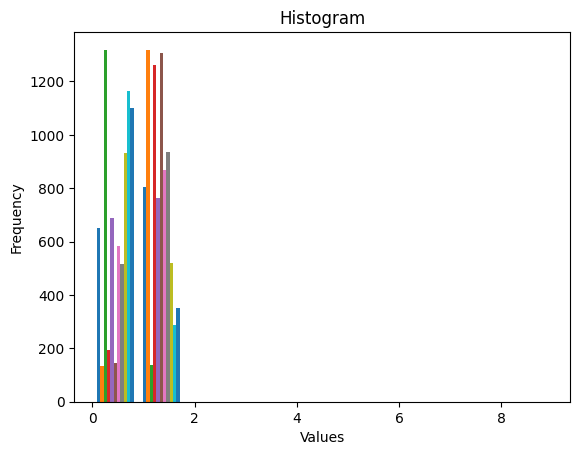

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming MD.km28 is a dictionary containing key "4" and MD.x is a DataFrame
# You may need to adjust this based on your actual data structures

# Create a histogram
plt.hist(MD_x, bins=10, range=(0, 9))

# Set labels and title
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram")

# Show the plot
plt.show()
